In [46]:
import pandas as pd

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [13]:

import os
print(os.listdir("./data"))

['abalone.csv']


In [18]:

# Load the Dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
url='./data/abalone.csv'
column_names = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]
abalone_df = pd.read_csv(url, header=0, names=column_names)

# Display the first few rows
abalone_df.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
abalone_df.info()
abalone_df.describe()
print(len(abalone_df.isnull()))
# Basic Characteristics
num_samples = abalone_df.shape[0]
num_attributes = abalone_df.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178 entries, 0 to 4177
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             4178 non-null   object
 1   Length          4178 non-null   object
 2   Diameter        4178 non-null   object
 3   Height          4178 non-null   object
 4   Whole_weight    4178 non-null   object
 5   Shucked_weight  4178 non-null   object
 6   Viscera_weight  4178 non-null   object
 7   Shell_weight    4178 non-null   object
 8   Rings           4178 non-null   object
dtypes: object(9)
memory usage: 293.9+ KB
4178
Sex               object
Length            object
Diameter          object
Height            object
Whole_weight      object
Shucked_weight    object
Viscera_weight    object
Shell_weight      object
Rings             object
dtype: object


In [19]:
# Assuming the abalone_df DataFrame has already been created
abalone_df['Sex'] = abalone_df['Sex'].astype('category')  # Convert 'Sex' to categorical type
abalone_df['Length'] = abalone_df['Length'].astype('float64')  # Length as float
abalone_df['Diameter'] = abalone_df['Diameter'].astype('float64')  # Diameter as float
abalone_df['Height'] = abalone_df['Height'].astype('float64')  # Height as float
abalone_df['Whole_weight'] = abalone_df['Whole_weight'].astype('float64')  # Whole weight as float
abalone_df['Shucked_weight'] = abalone_df['Shucked_weight'].astype('float64')  # Shucked weight as float
abalone_df['Viscera_weight'] = abalone_df['Viscera_weight'].astype('float64')  # Viscera weight as float
abalone_df['Shell_weight'] = abalone_df['Shell_weight'].astype('float64')  # Shell weight as float
abalone_df['Rings'] = abalone_df['Rings'].astype('int64')  # Rings as integer

#  print the data types after conversion
print(abalone_df.dtypes)


Sex               category
Length             float64
Diameter           float64
Height             float64
Whole_weight       float64
Shucked_weight     float64
Viscera_weight     float64
Shell_weight       float64
Rings                int64
dtype: object


In [20]:
# Print Characteristics
print(f"Number of Samples: {num_samples}")
print(f"Number of Attributes: {num_attributes}")


Number of Samples: 4178
Number of Attributes: 9


In [21]:
numeric_features = abalone_df.select_dtypes(include=[np.number])
correlation = numeric_features.corr()
correlation

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [36]:
#Identify Outliers

numeric_columns = abalone_df.select_dtypes(include='number').columns
# Identify outliers using the IQR method
Q1 = abalone_df[numeric_columns].quantile(0.25)
Q3 = abalone_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Identifying outliers
outlier_info = {}  # Dictionary to hold outlier information

for column in numeric_columns:
    outlier_condition = (abalone_df[column] < (Q1[column] - 1.5 * IQR[column])) | \
                        (abalone_df[column] > (Q3[column] + 1.5 * IQR[column]))
    
    # If there are any outliers for the current column
    if outlier_condition.any():
        outlier_indices = abalone_df[outlier_condition].index.tolist()  # Get the indices of outliers
        outlier_values = abalone_df.loc[outlier_condition, column].values.tolist()  # Get the outlier values
        outlier_info[column] = {'indices': outlier_indices, 'values': outlier_values}

# Step 4: Print outlier information
print("\n eventual outliers Found in Each Column:")
#for column, info in outlier_info.items():
  #  print(f"Column '{column}':")
  #  for i, value in zip(info['indices'], info['values']):
    #    print(f"  Row {i}: Outlier Value = {value}")

# Summary of the number of outliers per column
print("\nSummary of Outliers by Column:")
for column, info in outlier_info.items():
    print(f"Column '{column}' has {len(info['indices'])} outliers.")


 eventual outliers Found in Each Column:

Summary of Outliers by Column:
Column 'Length' has 49 outliers.
Column 'Diameter' has 59 outliers.
Column 'Height' has 29 outliers.
Column 'Whole_weight' has 30 outliers.
Column 'Shucked_weight' has 48 outliers.
Column 'Viscera_weight' has 26 outliers.
Column 'Shell_weight' has 35 outliers.
Column 'Rings' has 278 outliers.


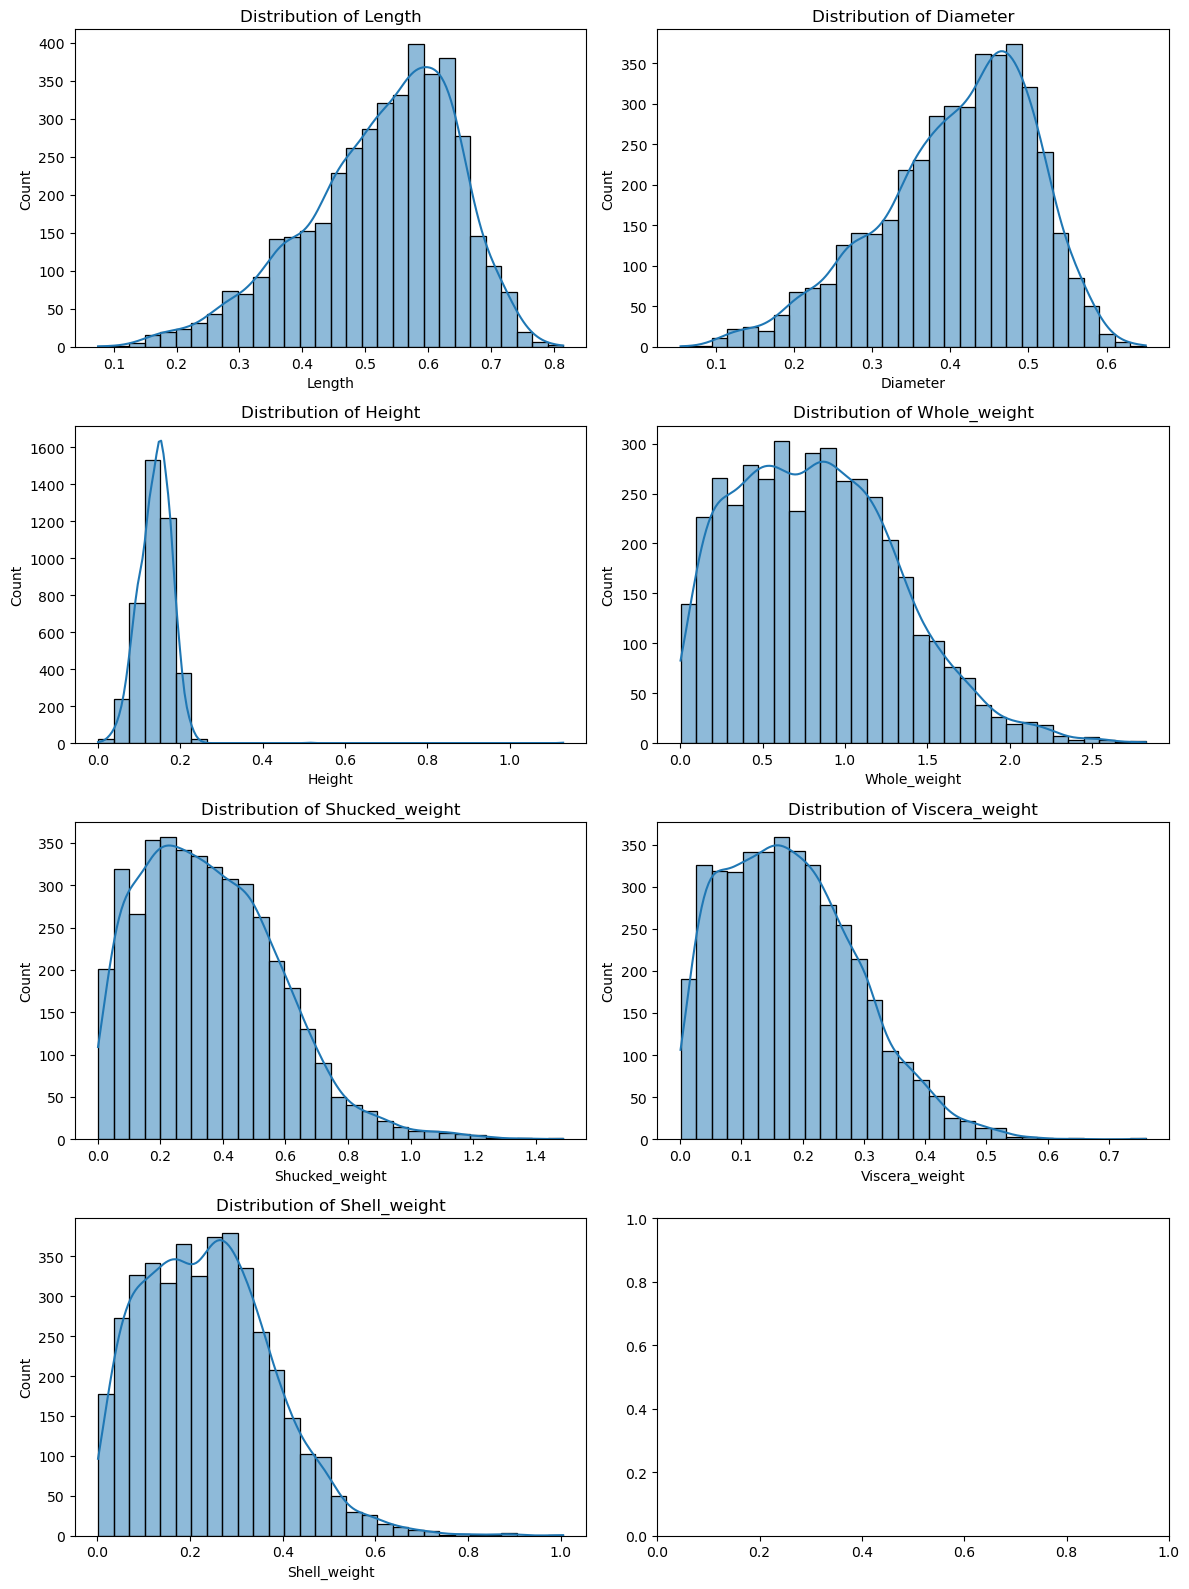

In [37]:
# Distribution of Input Attributes
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, column in enumerate(abalone_df.columns[1:8]):  # Skip 'Sex' and 'Rings'
    sns.histplot(abalone_df[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

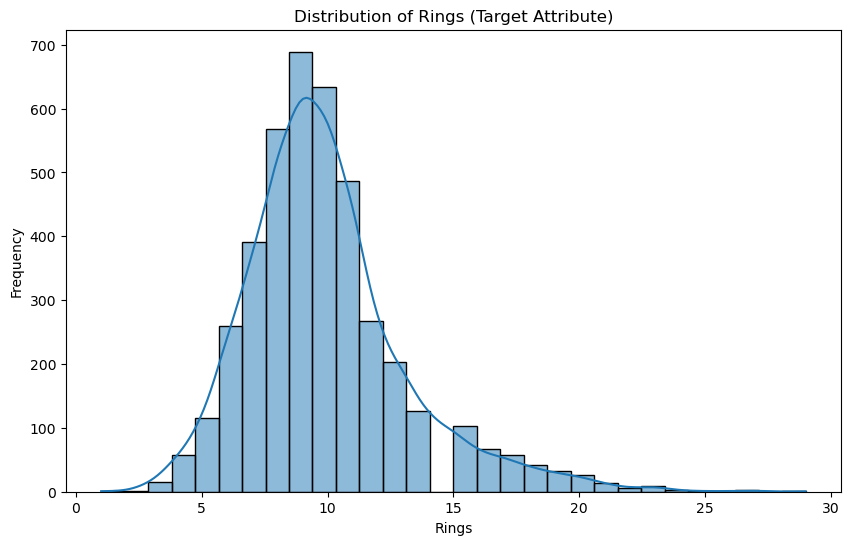

In [38]:
# Distribution of Target Attribute (Rings)
plt.figure(figsize=(10, 6))
sns.histplot(abalone_df['Rings'], bins=30, kde=True)
plt.title('Distribution of Rings (Target Attribute)')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Handling Categorical Data - One Hot Encoding
abalone_encoded = pd.get_dummies(abalone_df, columns=['Sex'], drop_first=True)

abalone_encoded.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


In [40]:
# Define categories based on Rings
def categorize_rings(rings):
    if rings < 8:
        return 'Low'
    elif rings <= 10:
        return 'Medium'
    else:
        return 'High'

abalone_encoded['Rings_Category'] = abalone_encoded['Rings'].apply(categorize_rings)
abalone_encoded.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M,Rings_Category
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True,High
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True,Low
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False,Medium
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True,Medium
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False,Low


In [41]:
# Define features and target variable
X = abalone_encoded.drop(['Rings', 'Rings_Category'], axis=1)  # Features
y = abalone_encoded['Rings_Category']  # Target variable

# If needed, encode categorical variables (though Sex_I and Sex_M are already in boolean format)
# No further encoding needed here for Sex_I and Sex_M as they are already in numerical format

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Create the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions
y_pred = classifier.predict(X_test)

# Print the confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[190   5  81]
 [  2 126  52]
 [103  25 252]]

Classification Report:
              precision    recall  f1-score   support

        High       0.64      0.69      0.67       276
         Low       0.81      0.70      0.75       180
      Medium       0.65      0.66      0.66       380

    accuracy                           0.68       836
   macro avg       0.70      0.68      0.69       836
weighted avg       0.68      0.68      0.68       836

